**1. Importing libraries + Loading Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("/content/Telco_Churn.csv")

**2. Understanding Dataset Structure**

In [2]:
print(df.head())
print(df.info())
print(df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1         NaN    Male            0.0      No         No    34.0          NaN   
2  3668-QPYBK     NaN            0.0      No         No     2.0          Yes   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            NaN  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

**3. Checking missing values**

In [3]:
df.isnull().sum()


,0
customerID,276
gender,366
SeniorCitizen,379
Partner,414
Dependents,505
tenure,456
PhoneService,192
MultipleLines,266
InternetService,419
OnlineSecurity,382


In [ ]:
df.duplicated().sum()

np.int64(0)

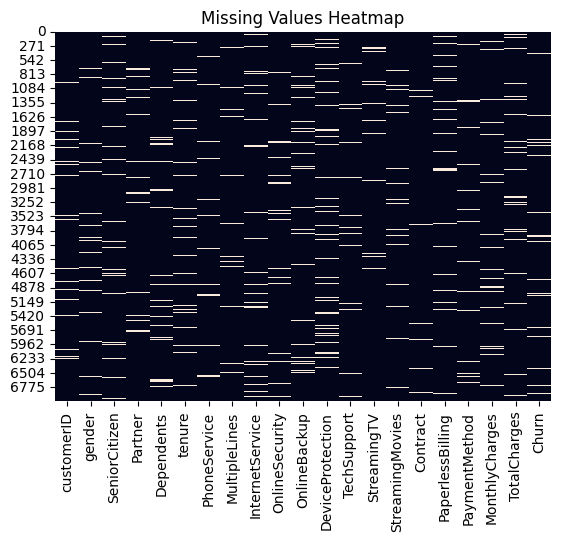

In [4]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


**4. Convert incorrect datatypes**

In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


/tmp/ipython-input-4226307296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


**5. Numerical feature distributions**

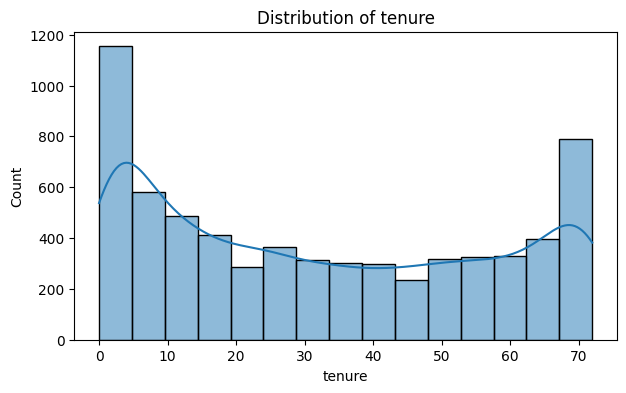

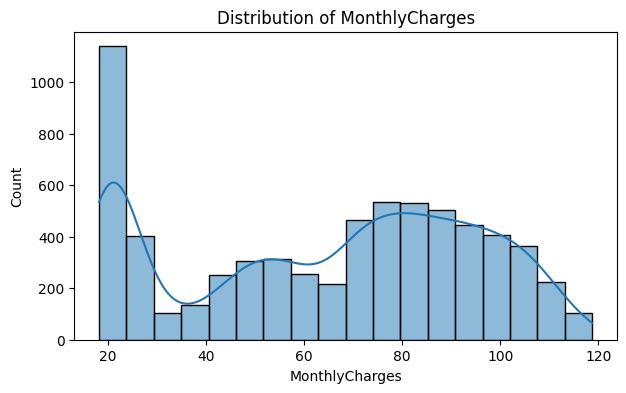

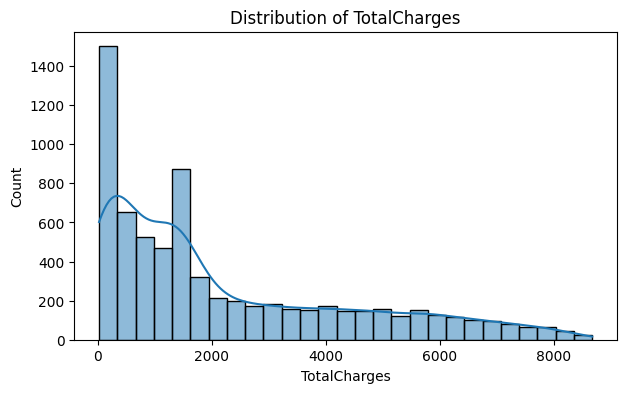

In [ ]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


**6. Boxplots → detecting outliers**

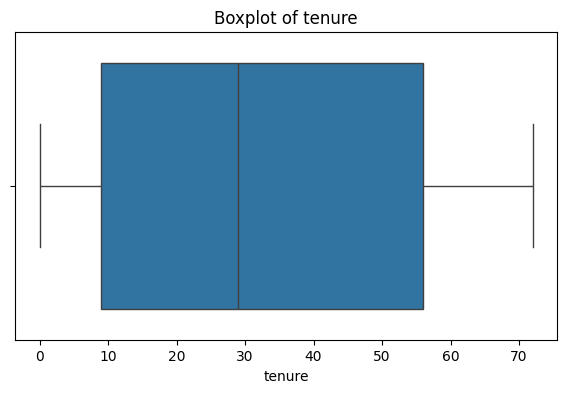

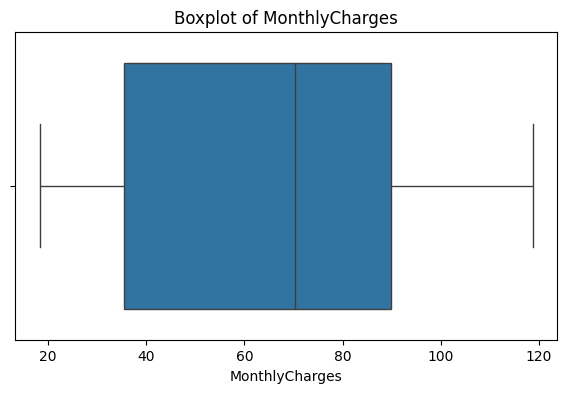

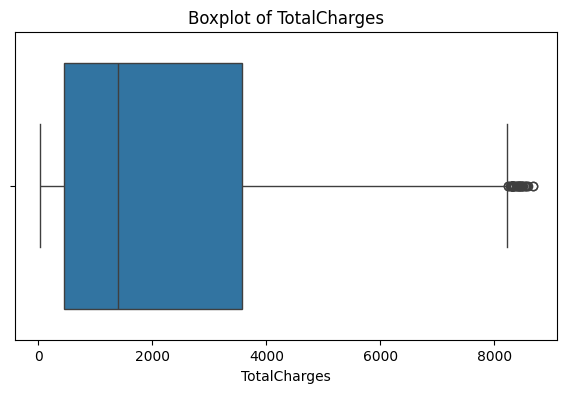

In [ ]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


7. Categorical feature distributions

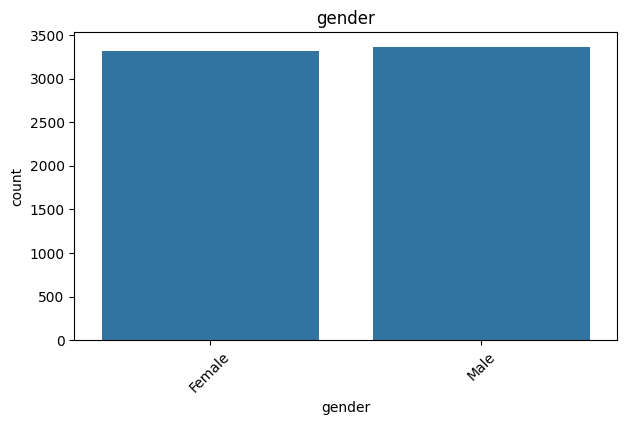

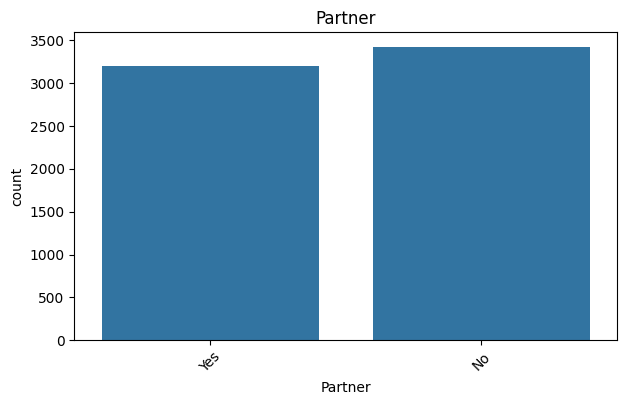

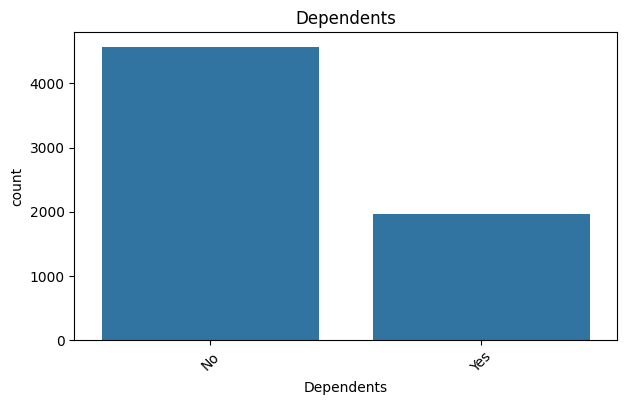

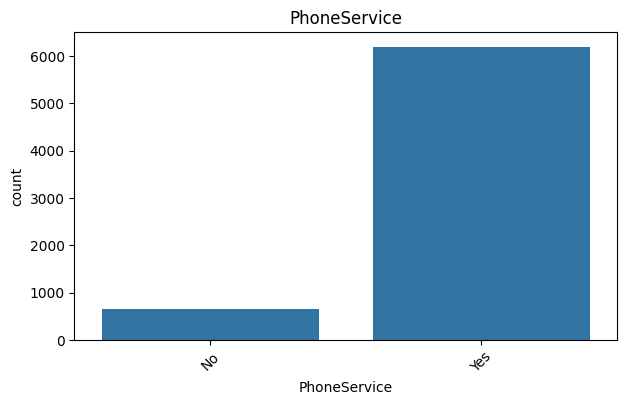

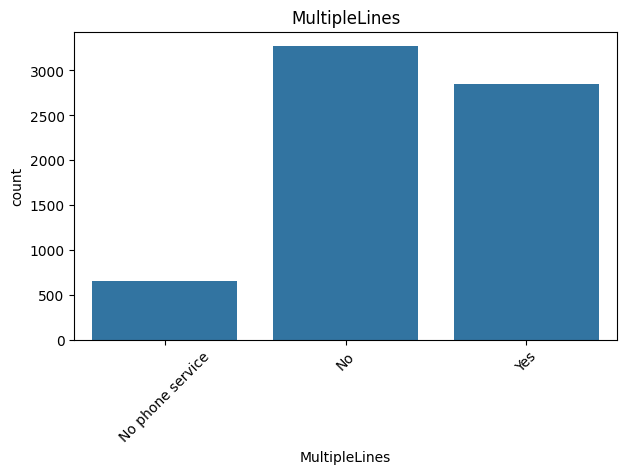

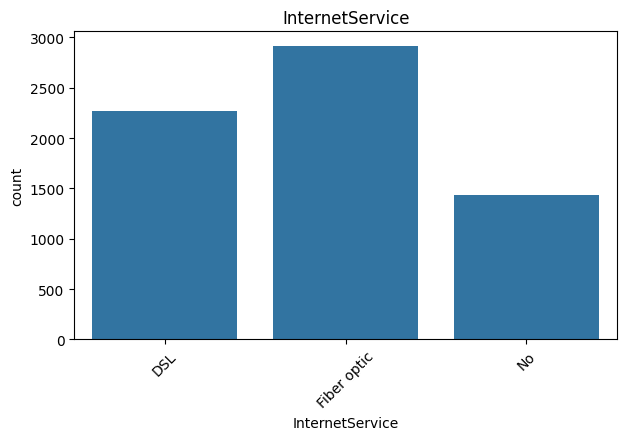

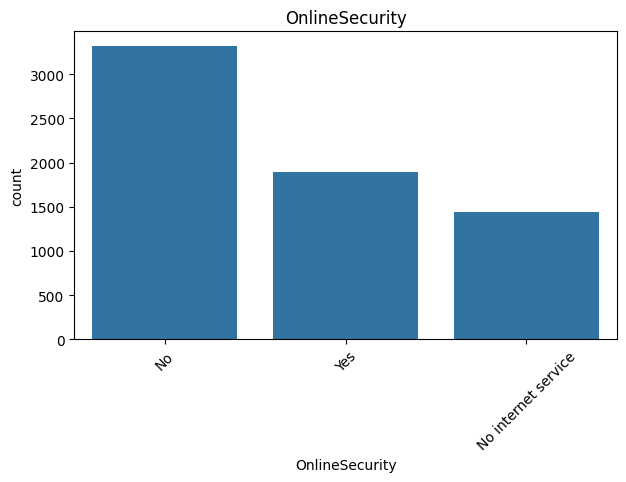

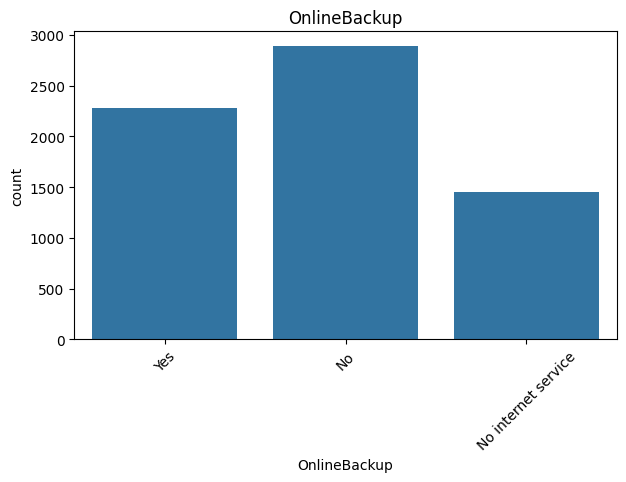

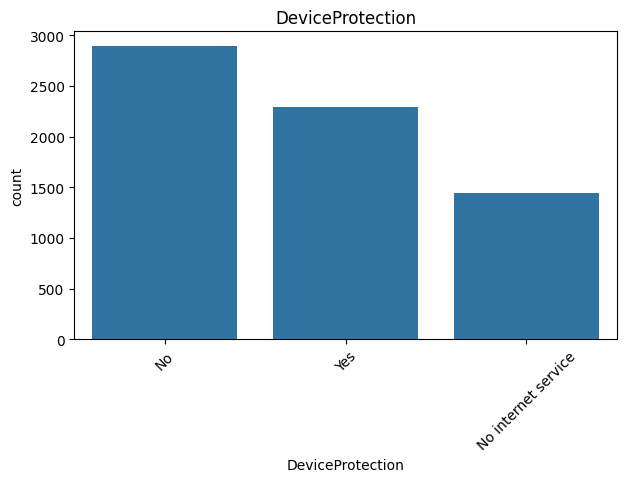

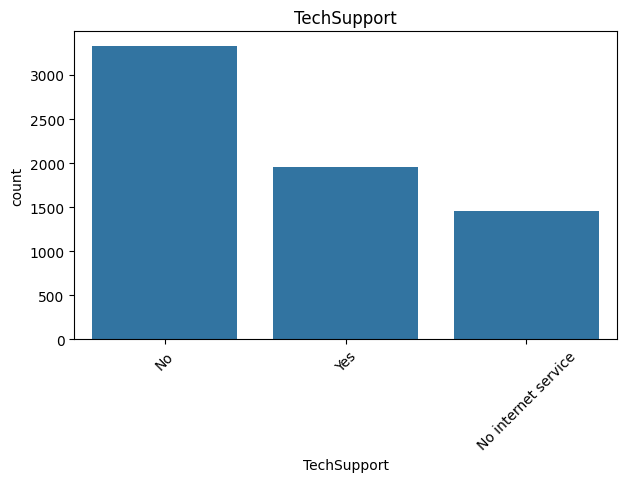

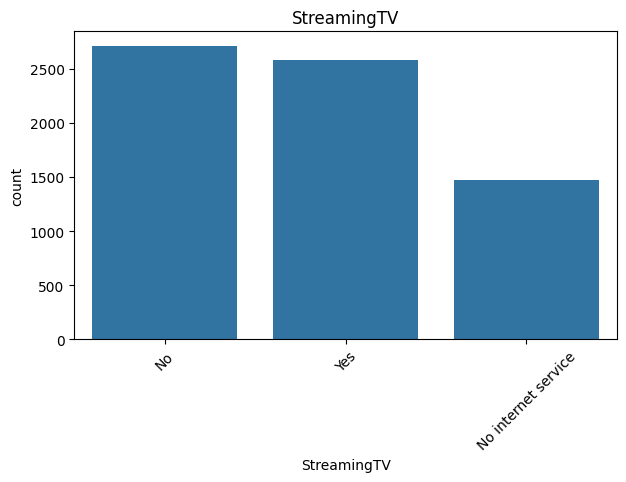

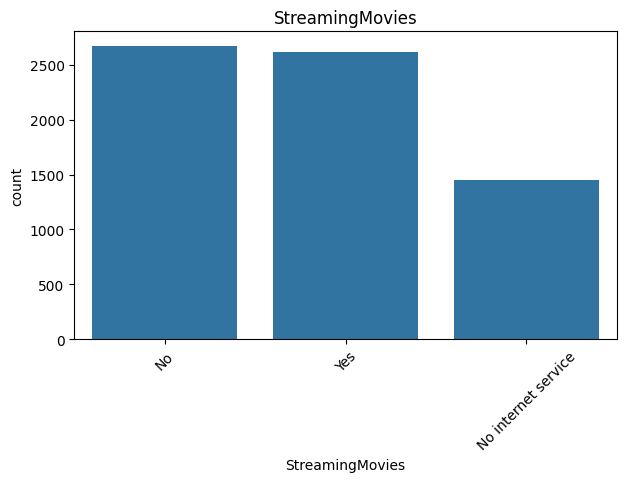

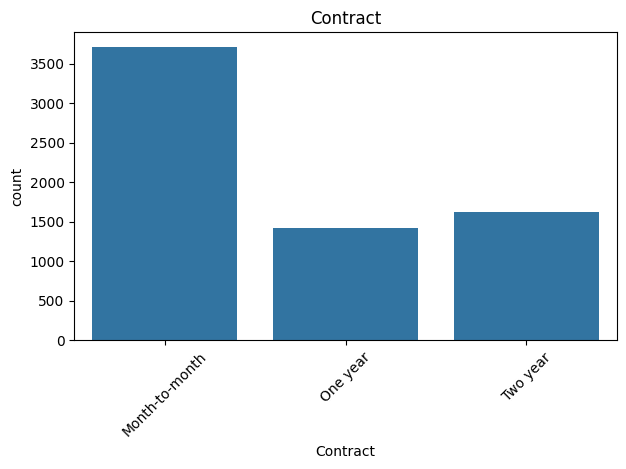

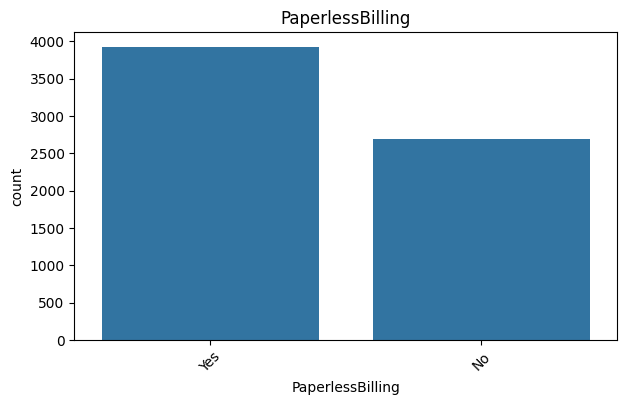

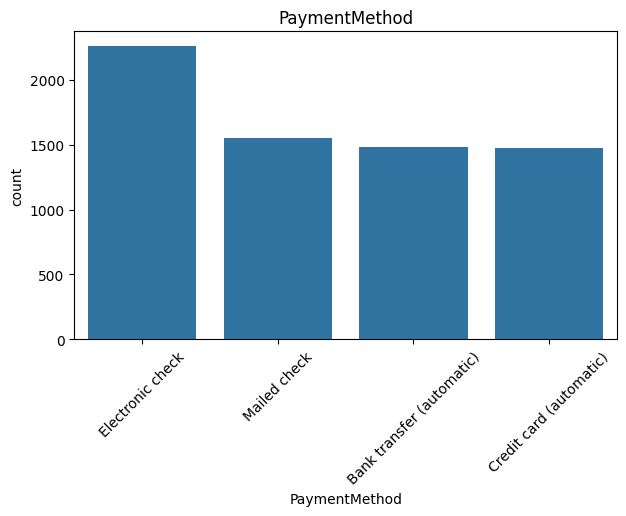

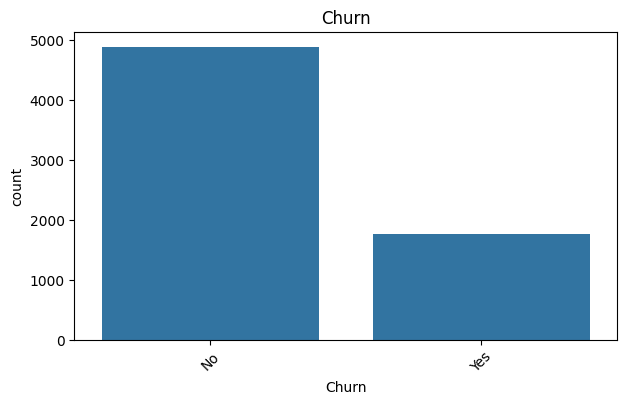

In [ ]:
cat_cols = df.select_dtypes(include="object").columns.drop("customerID")

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


8. Relationship with target (Churn)

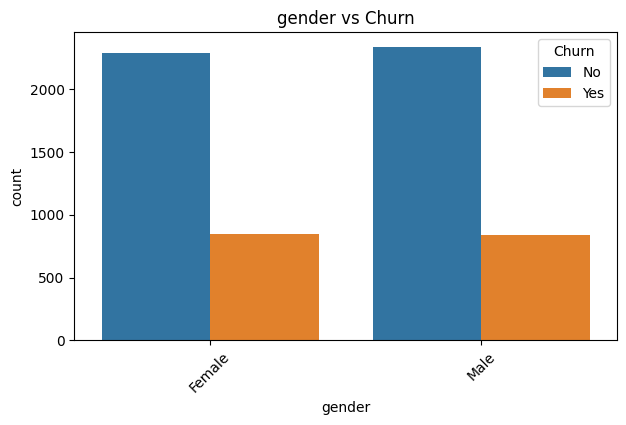

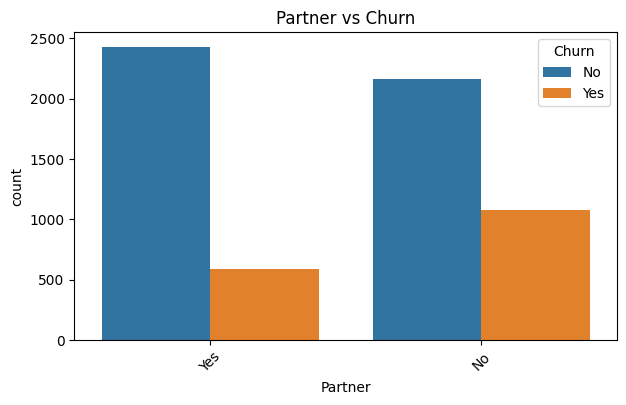

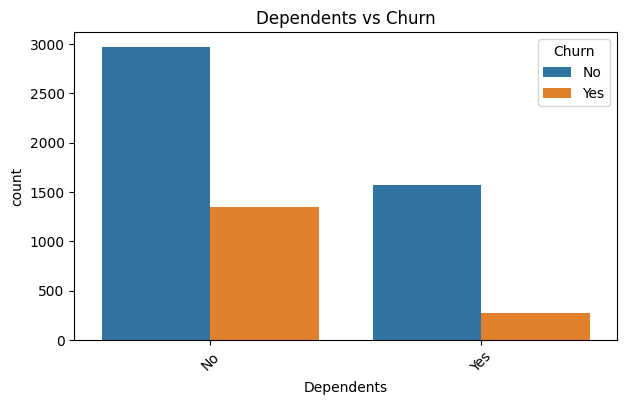

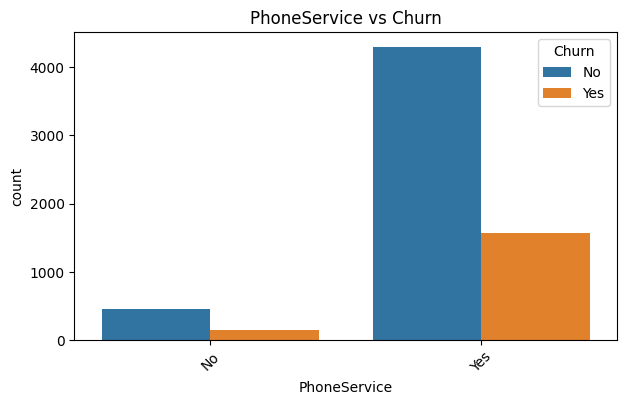

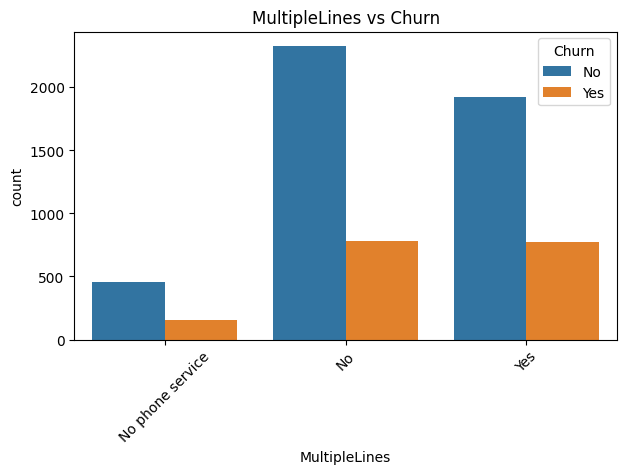

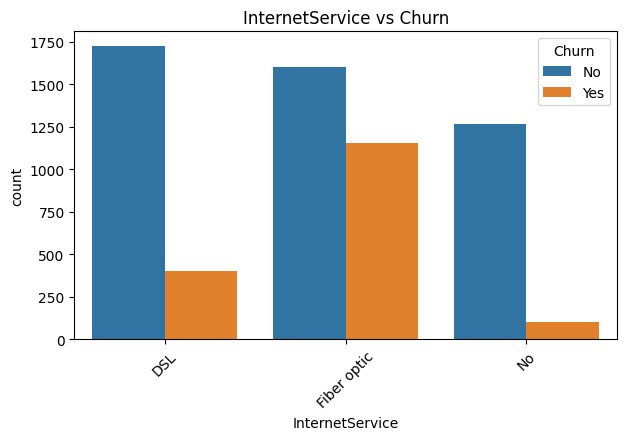

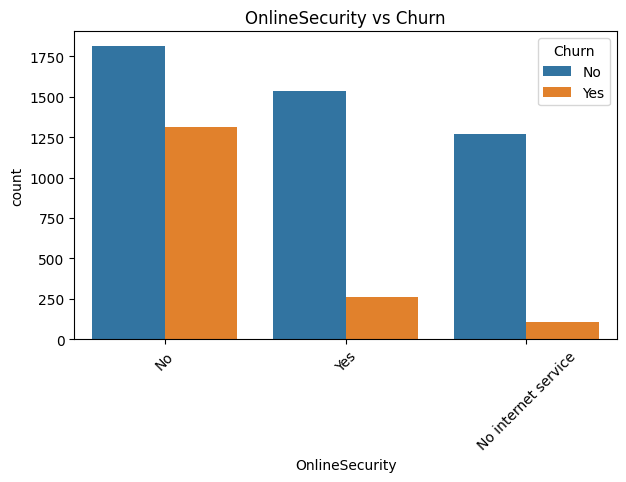

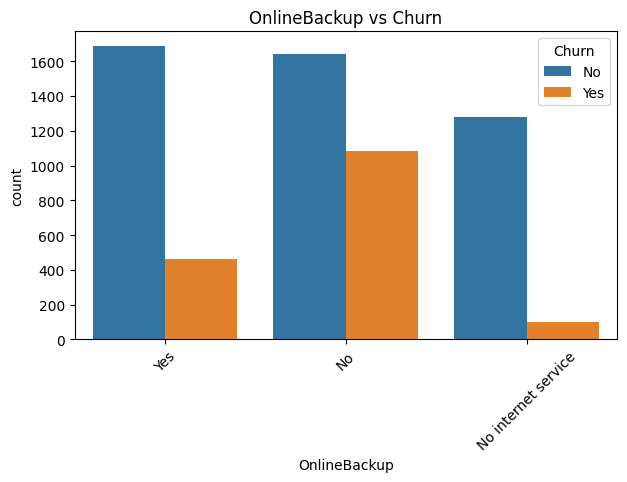

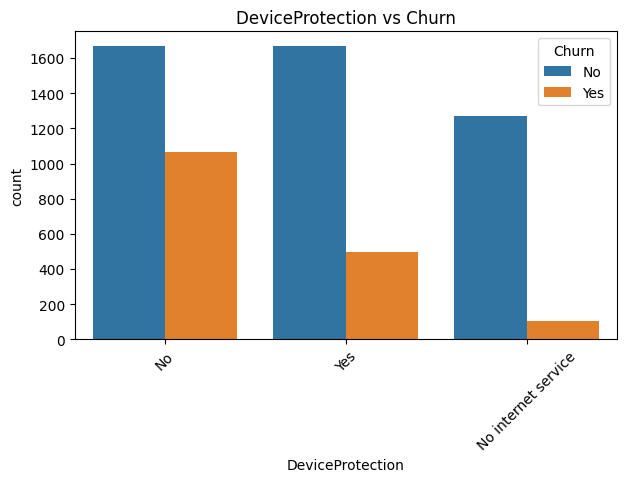

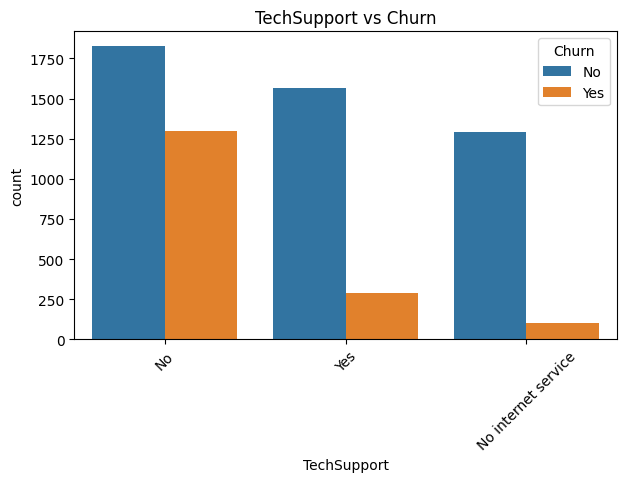

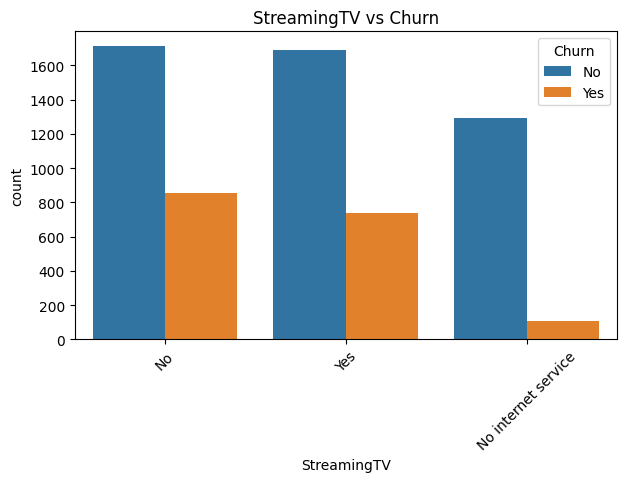

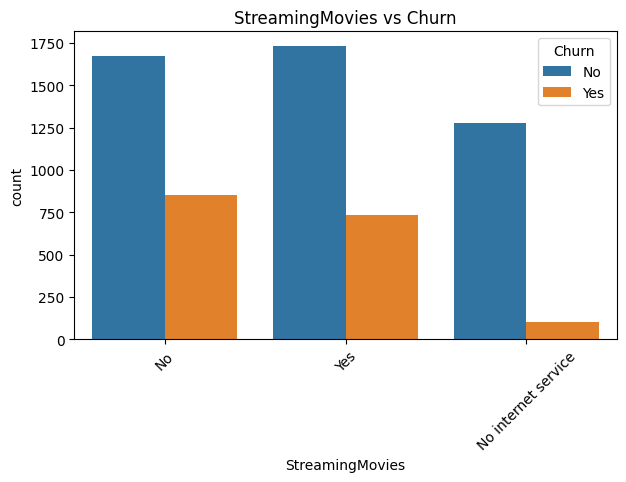

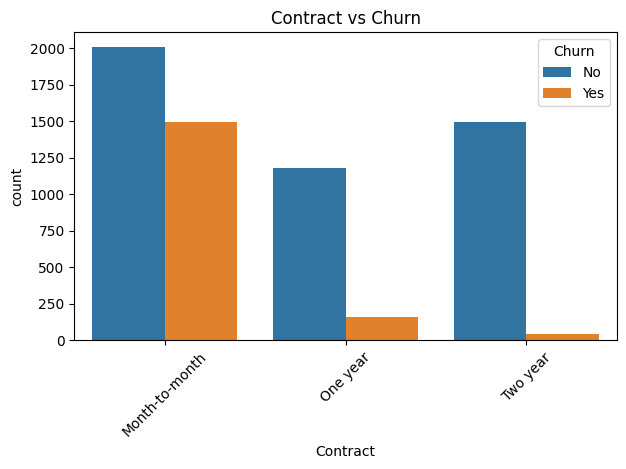

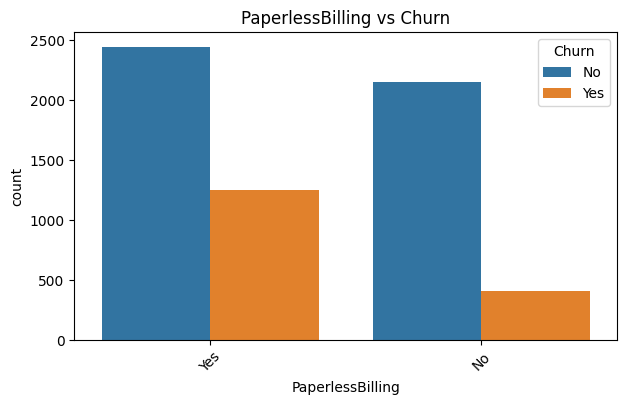

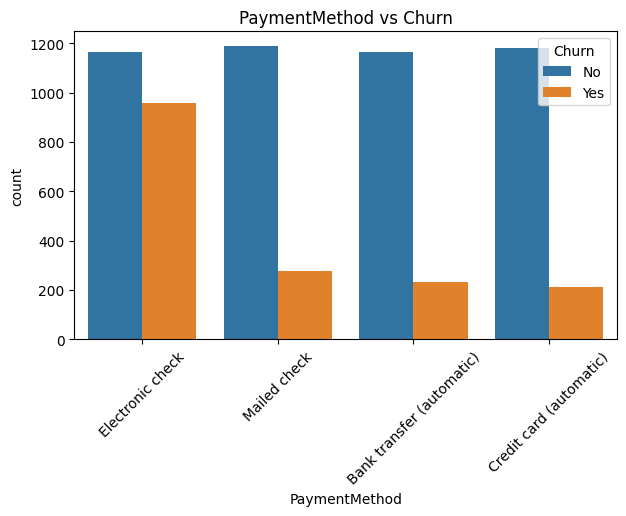

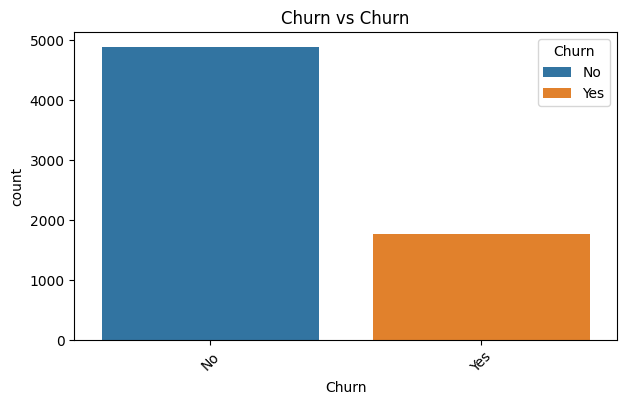

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


# **Preprocessing**

In [4]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-2144784952.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [5]:
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

for col in num_cols:
    cap_outliers(col)


In [6]:
#Remove leading/trailing spaces
df.columns = df.columns.str.strip()

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()


In [7]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

for col in binary_cols:
    df[col] = df[col].map({"Yes":1, "No":0})



In [8]:
df = pd.get_dummies(df, drop_first=True)


In [11]:
df.isna().sum()

,0
SeniorCitizen,0
Partner,414
Dependents,505
tenure,0
PhoneService,192
...,...
Contract_One year,0
Contract_Two year,0
PaymentMethod_Credit card (automatic),0
PaymentMethod_Electronic check,0


In [9]:
df = df.replace([np.inf, -np.inf], np.nan)
df.fillna(df.median(), inplace=True)

df.isnull().sum()


,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
...,...
Contract_One year,0
Contract_Two year,0
PaymentMethod_Credit card (automatic),0
PaymentMethod_Electronic check,0


In [10]:
df["AvgMonthlySpend"] = df["TotalCharges"] / (df["tenure"].replace(0, 1))


In [11]:
#IsNewCustomer
df["IsNewCustomer"] = (df["tenure"] <= 3).astype(int)


In [12]:
#Contract Duration Feature by month
df["ContractDuration"] = (
    df["Contract_One year"] * 12 +
    df["Contract_Two year"] * 24
).replace(0, 1)


In [13]:
#Total Services Count
service_yes_cols = [col for col in df.columns if col.endswith("_Yes")]
df["ServicesCount"] = df[service_yes_cols].sum(axis=1)



# **Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = df.drop("Churn", axis=1).select_dtypes(include=["int64","float64"]).columns
df[num_cols] = scaler.fit_transform(df[num_cols])



In [15]:
df["Churn"].unique(), df["Churn"].dtype


(array([0., 1.]), dtype('float64'))

In [16]:
from imblearn.over_sampling import SMOTE

X = df.drop("Churn", axis=1)
y = df["Churn"]

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [20]:
y_resampled.value_counts()

,count
Churn,
0.0,5274
1.0,5274


# **spliting**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # مهم علشان Churn غالباً مش balanced
)


# **Modeling**

    Logistic Regression
    Decision Tree
    Random Forest
    SVM
    ann

In [21]:
from sklearn.neural_network import MLPClassifier


In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "ANN (MLP)": MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=500,
        random_state=42
    )
}


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def train_evaluate_model(model, model_name):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n🔹 Results for {model_name}")
    print("-" * 40)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }



1.logistic regression

In [20]:
lr = LogisticRegression(max_iter=1000)
lr_result = train_evaluate_model(lr, "Logistic Regression")



🔹 Results for Logistic Regression
----------------------------------------
Accuracy : 0.8133427963094393
Precision: 0.6704119850187266
Recall   : 0.5056497175141242
F1-Score : 0.5764895330112721
ROC-AUC  : 0.8398131041315232


2.Decision Tree

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt_result = train_evaluate_model(dt, "Decision Tree")



🔹 Results for Decision Tree
----------------------------------------
Accuracy : 0.7558552164655784
Precision: 0.5153374233128835
Recall   : 0.4745762711864407
F1-Score : 0.49411764705882355
ROC-AUC  : 0.6624066190055427


3.Random Forest

In [22]:
rf = RandomForestClassifier(
    n_estimators=100,   # قللناه
    max_depth=10,       # مهم للتسريع
    random_state=42
)
rf_result = train_evaluate_model(rf, "Random Forest")



🔹 Results for Random Forest
----------------------------------------
Accuracy : 0.7487579843860894
Precision: 0.0
Recall   : 0.0
F1-Score : 0.0
ROC-AUC  : 0.832989262859132


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4.SVM

In [23]:
svm = SVC(
    probability=True,
    kernel="rbf",
    C=1,
    random_state=42
)
svm_result = train_evaluate_model(svm, "SVM")



🔹 Results for SVM
----------------------------------------
Accuracy : 0.8005677785663591
Precision: 0.6489795918367347
Recall   : 0.4491525423728814
F1-Score : 0.5308848080133556
ROC-AUC  : 0.7855838487696467


5.ANN

In [24]:
ann = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    max_iter=300,
    random_state=42
)
ann_result = train_evaluate_model(ann, "ANN (MLP)")



🔹 Results for ANN (MLP)
----------------------------------------
Accuracy : 0.723207948899929
Precision: 0.44886363636363635
Recall   : 0.4463276836158192
F1-Score : 0.4475920679886686
ROC-AUC  : 0.7113690524004606


all results

In [25]:
results_df = pd.DataFrame([
    lr_result,
    dt_result,
    rf_result,
    svm_result,
    ann_result
])

results_df.sort_values(by="Recall", ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.813343,0.670412,0.505650,0.576490,0.839813
1,Decision Tree,0.755855,0.515337,0.474576,0.494118,0.662407
3,SVM,0.800568,0.648980,0.449153,0.530885,0.785584
4,ANN (MLP),0.723208,0.448864,0.446328,0.447592,0.711369
2,Random Forest,0.748758,0.000000,0.000000,0.000000,0.832989


In [26]:
results_df.sort_values(by="Recall", ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.813343,0.670412,0.505650,0.576490,0.839813
1,Decision Tree,0.755855,0.515337,0.474576,0.494118,0.662407
3,SVM,0.800568,0.648980,0.449153,0.530885,0.785584
4,ANN (MLP),0.723208,0.448864,0.446328,0.447592,0.711369
2,Random Forest,0.748758,0.000000,0.000000,0.000000,0.832989


In [27]:
results_df.sort_values(by="ROC-AUC", ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.813343,0.670412,0.505650,0.576490,0.839813
2,Random Forest,0.748758,0.000000,0.000000,0.000000,0.832989
3,SVM,0.800568,0.648980,0.449153,0.530885,0.785584
4,ANN (MLP),0.723208,0.448864,0.446328,0.447592,0.711369
1,Decision Tree,0.755855,0.515337,0.474576,0.494118,0.662407


In [28]:
best_model_name = results_df.sort_values(by="Recall", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

best_model


LogisticRegression(max_iter=1000)

In [29]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.0 MB/s eta 0:00:00


In [30]:
pip install scikit-learn pandas joblib


In [32]:
import joblib

joblib.dump(best_model, "churn_model.pkl")


['churn_model.pkl']

In [33]:
from google.colab import files
files.download("churn_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
joblib.dump(X_train.columns.tolist(), "features.pkl")


['features.pkl']

In [35]:
files.download("features.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>